In [65]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from scipy.stats.mstats import winsorize

import numpy as np


from matplotlib import pyplot


In [2]:
inventory = pd.read_csv(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\inventory.csv')
products = pd.read_csv(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\products.csv')
sales = pd.read_csv(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\sales.csv')
stores = pd.read_csv(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\stores.csv')

In [3]:
inventory.head()

,Store_ID,Product_ID,Stock_On_Hand
0,1,1,27
1,1,2,0
2,1,3,32
3,1,4,6
4,1,5,0


In [4]:
sales.head()

,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2017-01-01,24,4,1
1,2,2017-01-01,28,1,1
2,3,2017-01-01,6,8,1
3,4,2017-01-01,48,7,1
4,5,2017-01-01,44,18,1


In [5]:
products.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,9.99,15.99
1,2,Animal Figures,Toys,9.99,12.99
2,3,Barrel O' Slime,Art & Crafts,1.99,3.99
3,4,Chutes & Ladders,Games,9.99,12.99
4,5,Classic Dominoes,Games,7.99,9.99


In [6]:
stores.head()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31


In [7]:
sales1 = pd.merge(sales, products, on='Product_ID')
sales2 = pd.merge(sales1, stores, on='Store_ID')


sales2['sales'] = sales2['Units'] * sales2['Product_Price']
sales2['cost'] = sales2['Units'] * sales2['Product_Cost']



##Changing the data column into date format
sales2['Date'] = pd.to_datetime(sales2['Date'])
sales2.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Name,Product_Category,Product_Cost,Product_Price,Store_Name,Store_City,Store_Location,Store_Open_Date,sales,cost
0,1,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99
1,66,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99
2,98,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99
3,128,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99
4,146,2017-01-01,24,4,1,Chutes & Ladders,Games,9.99,12.99,Maven Toys Aguascalientes 1,Aguascalientes,Downtown,2010-07-31,12.99,9.99


In [8]:
sales3 = pd.merge(sales2, inventory, on=['Product_ID','Store_ID'])

In [75]:
sales3.to_excel(r'C:\Users\Sruja\Documents\MS-DS-COURSES\Info 5082\Mexico toy store\sales3.xlsx',index = False)

In [9]:
sales2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829262 entries, 0 to 829261
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           829262 non-null  int64         
 1   Date              829262 non-null  datetime64[ns]
 2   Store_ID          829262 non-null  int64         
 3   Product_ID        829262 non-null  int64         
 4   Units             829262 non-null  int64         
 5   Product_Name      829262 non-null  object        
 6   Product_Category  829262 non-null  object        
 7   Product_Cost      829262 non-null  float64       
 8   Product_Price     829262 non-null  float64       
 9   Store_Name        829262 non-null  object        
 10  Store_City        829262 non-null  object        
 11  Store_Location    829262 non-null  object        
 12  Store_Open_Date   829262 non-null  object        
 13  sales             829262 non-null  float64       
 14  cost

In [10]:
sales2.isnull().sum()

Sale_ID             0
Date                0
Store_ID            0
Product_ID          0
Units               0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
Store_Name          0
Store_City          0
Store_Location      0
Store_Open_Date     0
sales               0
cost                0
dtype: int64

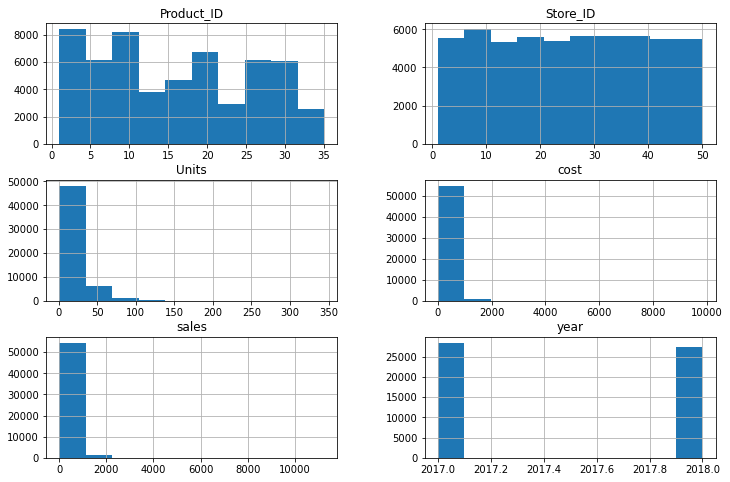

In [73]:
sales_weekly.hist(figsize=(12,8))
pyplot.show()

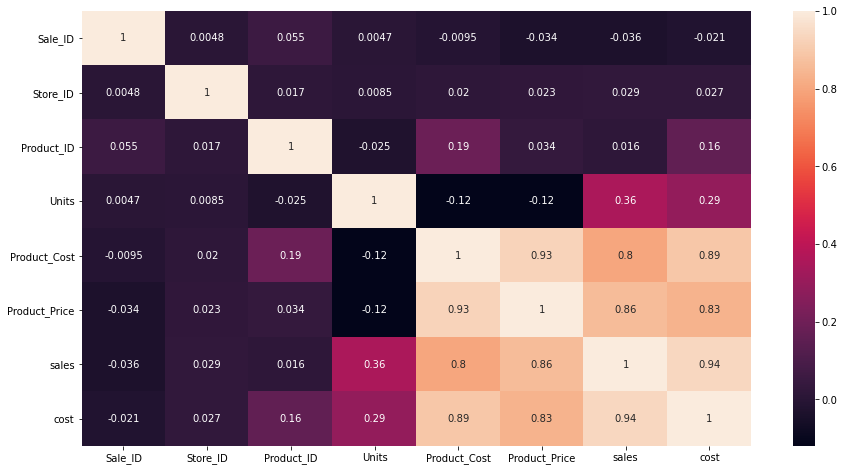

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(sales2.corr('spearman'), annot = True);

In [12]:
sales_daily = pd.DataFrame(sales2.groupby('Date').sales.sum())



sales_daily


,sales
Date,
2017-01-01,21076.15
2017-01-02,19750.94
2017-01-03,11759.50
2017-01-04,14814.40
2017-01-05,19791.30
...,...
2018-09-26,15518.49
2018-09-27,18351.04
2018-09-28,25940.93


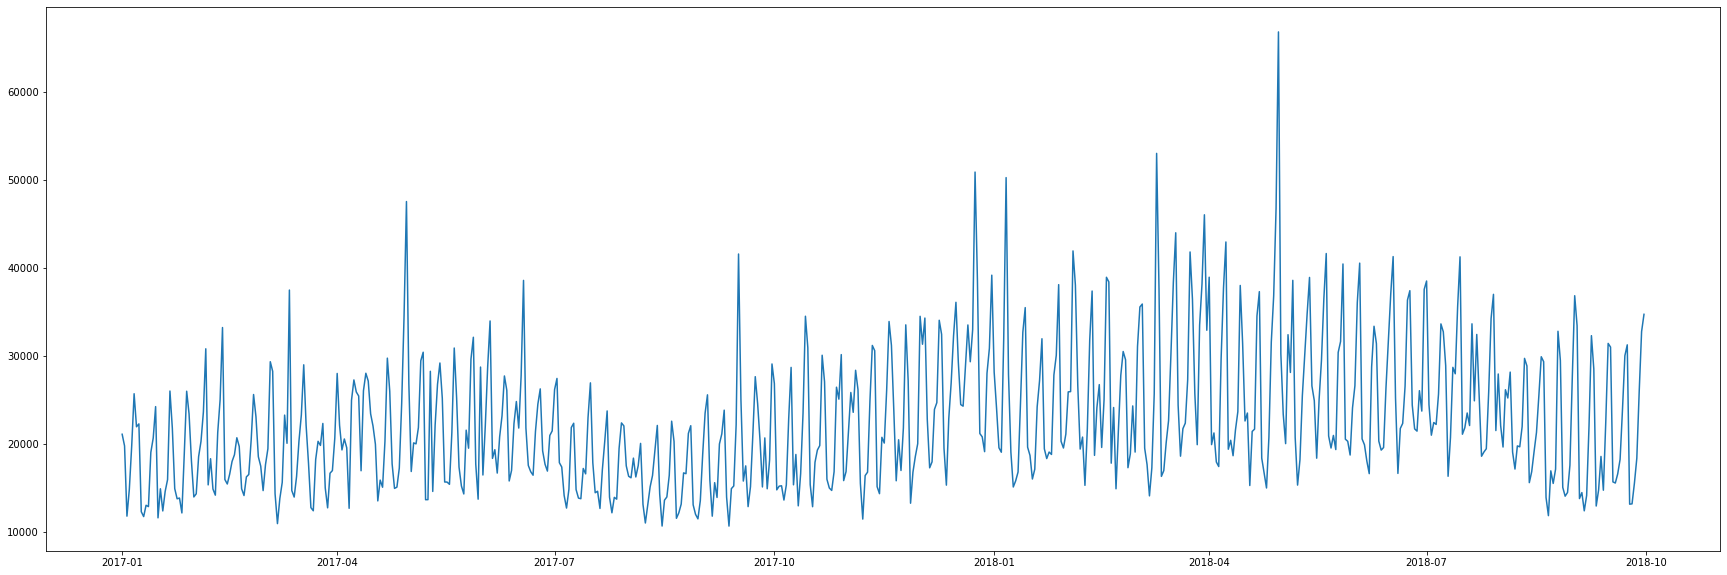

In [13]:
plt.figure(figsize=(30, 10))
plt.plot(sales_daily, label='Daily')

In [14]:
sales2.groupby(['Product_Name'])['sales'].sum().sort_values(ascending=False)

Product_Name
Lego Bricks              2.388883e+06
Colorbuds                1.564476e+06
Magic Sand               9.689620e+05
Action Figure            9.267484e+05
Rubik's Cube             9.129833e+05
Deck Of Cards            5.873977e+05
Splash Balls             5.416295e+05
Nerf Gun                 5.305946e+05
Animal Figures           5.077661e+05
Dart Gun                 5.050921e+05
Kids Makeup Kit          4.884157e+05
Dinosaur Figures         4.348899e+05
Dino Egg                 4.202136e+05
Glass Marbles            4.123228e+05
Gamer Headphones         3.769384e+05
Barrel O' Slime          3.657354e+05
Mini Ping Pong Set       3.357040e+05
PlayDoh Can              3.083527e+05
Toy Robot                3.053565e+05
Etch A Sketch            2.554063e+05
PlayDoh Playset          1.573870e+05
Hot Wheels 5-Pack        1.357274e+05
Jenga                    1.304095e+05
PlayDoh Toolkit          1.154087e+05
Plush Pony               1.097051e+05
Supersoaker Water Gun    1.018271e+05

In [46]:
sales_weekly = sales2.groupby([sales2['Date'].dt.year.rename('year'), sales2['Date'].dt.to_period("W").rename('week'),'Product_ID','Store_ID'])['sales'].sum().reset_index()


sales_weekly = sales_monthly_test.merge(sales2.groupby([sales2['Date'].dt.year.rename('year'), sales2['Date'].dt.to_period("W").rename('week'),'Product_ID','Store_ID'])['cost'].sum().reset_index())


sales_weekly = sales_monthly_test.merge(sales2.groupby([sales2['Date'].dt.year.rename('year'), sales2['Date'].dt.to_period("W").rename('week'),'Product_ID','Store_ID'])['Units'].sum().reset_index())







In [47]:
sales_weekly

,year,week,Product_ID,Store_ID,sales,cost,Units
0,2017,2016-12-26/2017-01-01,1,4,95.94,59.94,6
1,2017,2016-12-26/2017-01-01,1,9,143.91,89.91,9
2,2017,2016-12-26/2017-01-01,1,10,63.96,39.96,4
3,2017,2016-12-26/2017-01-01,1,21,207.87,129.87,13
4,2017,2016-12-26/2017-01-01,1,28,95.94,59.94,6
...,...,...,...,...,...,...,...
55757,2018,2018-09-24/2018-09-30,35,16,183.77,91.77,23
55758,2018,2018-09-24/2018-09-30,35,22,23.97,11.97,3
55759,2018,2018-09-24/2018-09-30,35,26,111.86,55.86,14
55760,2018,2018-09-24/2018-09-30,35,41,47.94,23.94,6


In [65]:
##sales_monthly['sales']=winsorize(sales_monthly['sales'], limits=0.05)
##sales_monthly['Units']=winsorize(sales_monthly['Units'], limits=0.1)
##sales_monthly['cost']=winsorize(sales_monthly['cost'], limits=0.1)

In [17]:
#############Importing packages##############
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics



In [48]:
x = sales_weekly[['Units','cost']]

In [49]:
y = sales_weekly['sales']

In [51]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2)

In [52]:
model1 = LinearRegression()

In [53]:
model1.fit(x_train1, y_train1)

LinearRegression()

In [54]:
print(model1.coef_)

[2.8235433  1.07522447]


In [55]:
print(model1.intercept_)

2.820248966837994


In [56]:
pd.DataFrame(model1.coef_, x.columns, columns = ['Coeff'])

,Coeff
Units,2.823543
cost,1.075224


In [57]:
model1.score(x_train1, y_train1)

0.9559412261276342

In [58]:
y_pred1 = model1.predict(x_test1)

In [59]:
df = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
df

,Actual,Predicted
26964,687.57,586.116785
42636,59.95,65.269305
19733,287.82,246.990892
53635,87.92,59.729760
21700,41.93,52.616071
...,...,...
4874,1394.07,964.380946
14259,142.87,123.254041
18842,314.79,310.265713
24311,699.65,778.659351


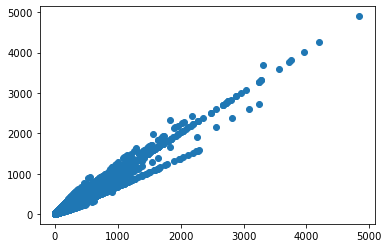

In [60]:
plt.scatter(y_test1, y_pred1 )

(array([3.000e+00, 1.800e+01, 1.660e+02, 3.672e+03, 6.788e+03, 3.700e+02,
        7.700e+01, 3.800e+01, 1.300e+01, 8.000e+00]),
 array([-495.0113689 , -374.63750055, -254.26363221, -133.88976386,
         -13.51589552,  106.85797283,  227.23184117,  347.60570952,
         467.97957786,  588.35344621,  708.72731455]),
 <a list of 10 Patch objects>)

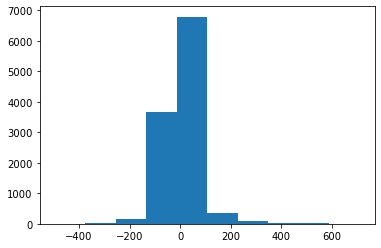

In [61]:
plt.hist(y_test1 - y_pred1)

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1)) 
print('Mean Absolute Error:', metrics.mean_squared_error(y_test1, y_pred1)) 
print("The mean absolute % error is {}%".format(round(np.mean(np.abs(y_pred1- y_test1.values)/np.abs(y_test1.values))*100,2)))

Mean Absolute Error: 37.324363729396865
Mean Absolute Error: 4495.3459376202445
The mean absolute % error is 19.55%


In [63]:
r2_score(df.Actual, df.Predicted)

0.9557761534070274

###### We cant use linear regression for this data as it doesn't satisfy  linear assumption: The dependent variable is not normally distributed .

The residual have a patterns , that is variance of residuals grows with dependent variable.
The autocorrelation would exist in a time series while it is 0 in LinearRegression